In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import warnings
import sys
import metpy
import matplotlib
import matplotlib.gridspec as gridspec
import geopandas
import metpy.calc as mpcalc
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
from netCDF4 import Dataset
import os
import glob

In [2]:
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
files = []
for i in ["39","40","41","42","43","44","45","46"]:
    CTT_files = [
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.20220"+i+".000000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.20220"+i+".010000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.20220"+i+".020000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.20220"+i+".030000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.20220"+i+".040000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.20220"+i+".050000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.20220"+i+".060000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.20220"+i+".070000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.20220"+i+".080000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.20220"+i+".090000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.20220"+i+".100000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.20220"+i+".110000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.20220"+i+".120000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.20220"+i+".130000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.20220"+i+".140000.FLDK.R20.nc",
      #  "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.20220"+i+".150000.FLDK.R20.nc",
      #  "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.20220"+i+".160000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.20220"+i+".170000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.20220"+i+".180000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.20220"+i+".190000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.20220"+i+".200000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.20220"+i+".210000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.20220"+i+".220000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.20220"+i+".230000.FLDK.R20.nc"]
    files.append(CTT_files)

In [10]:
fp = "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022039.230000.FLDK.R20.nc"
dshim8CTT = xr.open_dataset(fp, engine="netcdf4")#,combine='nested',concat_dim=('hour'))
band1 = dshim8CTT.Band1
dshim8CTT

<xarray.Dataset>
Dimensions:  (lat: 556, lon: 833)
Coordinates:
  * lat      (lat) float64 -22.0 -21.98 -21.96 -21.95 ... -12.04 -12.03 -12.01
  * lon      (lon) float64 140.0 140.0 140.0 140.1 ... 154.9 154.9 155.0 155.0
Data variables:
    Band1    (lat, lon) float64 ...
    crs      |S1 ...
Attributes:
    Conventions:  CF-1.5
    GDAL:         GDAL 3.5.0, released 2022/05/10
    history:      Wed Oct 05 19:11:09 2022: GDAL CreateCopy( R_geocatL2.HIMAW...
    subtitle:     My model data subtitle
    title:        My model data

In [9]:
CTT_files_039 = [
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022039.000000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022039.010000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022039.020000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022039.030000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022039.040000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022039.050000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022039.060000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022039.070000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022039.080000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022039.090000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022039.100000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022039.110000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022039.120000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022039.130000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022039.140000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022039.150000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022039.160000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022039.170000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022039.180000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022039.190000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022039.200000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022039.210000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022039.220000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022039.230000.FLDK.R20.nc"]
CTT_files_040 = [
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022040.000000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022040.010000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022040.020000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022040.030000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022040.040000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022040.050000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022040.060000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022040.070000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022040.080000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022040.090000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022040.100000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022040.110000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022040.120000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022040.130000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022040.140000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022040.150000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022040.160000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022040.170000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022040.180000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022040.190000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022040.200000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022040.210000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022040.220000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022040.230000.FLDK.R20.nc"]
CTT_files_041 = [
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022041.000000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022041.010000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022041.020000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022041.030000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022041.040000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022041.050000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022041.060000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022041.070000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022041.080000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022041.090000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022041.100000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022041.110000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022041.120000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022041.130000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022041.140000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022041.150000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022041.170000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022041.180000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022041.190000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022041.200000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022041.210000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022041.220000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022041.230000.FLDK.R20.nc"]
CTT_files_042 = [
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022042.000000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022042.010000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022042.020000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022042.030000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022042.040000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022042.050000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022042.060000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022042.070000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022042.080000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022042.090000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022042.100000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022042.110000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022042.120000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022042.130000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022042.140000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022042.150000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022042.160000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022042.170000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022042.180000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022042.190000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022042.200000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022042.210000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022042.220000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022042.230000.FLDK.R20.nc"]
CTT_files_043 = [
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022043.000000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022043.010000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022043.020000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022043.030000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022043.040000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022043.050000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022043.060000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022043.070000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022043.080000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022043.090000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022043.100000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022043.110000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022043.120000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022043.130000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022043.140000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022043.150000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022043.160000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022043.170000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022043.180000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022043.190000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022043.200000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022043.210000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022043.220000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022043.230000.FLDK.R20.nc"]
CTT_files_044 = [
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022044.000000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022044.010000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022044.020000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022044.030000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022044.040000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022044.050000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022044.060000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022044.070000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022044.080000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022044.090000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022044.100000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022044.110000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022044.120000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022044.130000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022044.140000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022044.150000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022044.160000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022044.170000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022044.180000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022044.190000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022044.200000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022044.210000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022044.220000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022044.230000.FLDK.R20.nc"]
CTT_files_045 = [
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022045.000000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022045.010000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022045.020000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022045.030000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022045.040000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022045.050000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022045.060000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022045.070000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022045.080000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022045.090000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022045.100000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022045.110000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022045.120000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022045.130000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022045.140000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022045.150000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022045.160000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022045.170000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022045.180000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022045.190000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022045.200000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022045.210000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022045.220000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022045.230000.FLDK.R20.nc"]
CTT_files_046 = [
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022046.000000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022046.010000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022046.020000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022046.030000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022046.040000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022046.050000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022046.060000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022046.070000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022046.080000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022046.090000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022046.100000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022046.110000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022046.120000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022046.130000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022046.140000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022046.170000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022046.180000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022046.190000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022046.200000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022046.210000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022046.220000.FLDK.R20.nc",
        "/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/ALANAH/CTT_geocatL2.HIMAWARI-8.2022046.230000.FLDK.R20.nc"]
CTT_files = CTT_files_044+CTT_files_045+CTT_files_046 #CTT_files_039+CTT_files_040+CTT_files_041+CTT_files_042+CTT_files_043+
ds_him8CTT = xr.open_mfdataset(CTT_files, engine="netcdf4",combine='nested',concat_dim=('hour'))
band1 = ds_him8CTT.Band1

In [25]:
band1.groupby("hour")
band1

<xarray.DataArray 'Band1' (hour: 70, lat: 556, lon: 833)>
dask.array<concatenate, shape=(70, 556, 833), dtype=float64, chunksize=(1, 556, 833), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -22.0 -21.98 -21.96 -21.95 ... -12.04 -12.03 -12.01
  * lon      (lon) float64 140.0 140.0 140.0 140.1 ... 154.9 154.9 155.0 155.0
Dimensions without coordinates: hour
Attributes:
    long_name:      GDAL Band Number 1
    grid_mapping:   geostationary
    standard_name:  air_temperature
    units:          K

In [23]:
def plot_hovmoller(level_data,cmap,suptitle,cbar_units): 
 #   time = np.arange(0,2.90,(1/24)) #7.85 for all case study days

    # Get data, selecting time, lat/lon slice
    variable_data_T = band1.isel(lat=144).values
    variable_data_C = band1.isel(lat=288).values
    variable_data_W = band1.isel(lat=318).values
        
    # Get times and make array of datetime objects
    time = band1["hour"].astype('datetime64[s]')
   # variable_times_T = band1.groupby("hour")
   # variable_times_C = band1.groupby("hour")
   # variable_times_W = band1.groupby("hour") #variable_data_W.time.values.astype('datetime64[ns]').astype('O')

    # Specify longitude values for chosen domain
    lons_T = band1.lon.values
    lons_C = band1.lon.values
    lons_W = band1.lon.values
    
    # make plot
    fig, ax = plt.subplots(1,3,figsize=(18,10))
    fig.patch.set_facecolor('white')
    ax[0].set_xlim(144,149)
    ax[1].set_xlim(143,148)
    ax[2].set_xlim(147,153)
    
    # Set some titles
    ax[0].set_title('Townsville', loc='left', fontsize=20,fontweight=0.9)
    ax[1].set_title('Cairns', loc='left', fontsize=20,fontweight=0.9)
    ax[2].set_title('Willis Island', loc='left', fontsize=20,fontweight=0.9)
    fig.figure.suptitle(suptitle,fontsize=30) #,x=0.2,y=0.98,

    # Plot of chosen variable averaged over latitude and slightly smoothed
    levels = level_data
    cf_T = ax[0].contourf(lons_T, time, variable_data_T, levels=levels, cmap=cmap, extend='both')
    cf_C = ax[1].contourf(lons_C, time, variable_data_C, levels=levels, cmap=cmap, extend='both')
    cf_W = ax[2].contourf(lons_W, time, variable_data_W, levels=levels, cmap=cmap, extend='both')               
                    
    # cbar and cbar label                
    cbar_W = plt.colorbar(cf_T, ax=ax[2],orientation='vertical', pad=0.04, aspect=30, extendrect=True)
    cbar_W.set_label(cbar_units,fontsize=15)
    
    # plot vertical lines to represent coastlines
    ax[0].axvline(147.5,color='blue',alpha=0.2,linestyle='--')
    ax[1].axvline(145.75,color='blue',alpha=0.2,linestyle='--')
    
    # plot locations of radars
    ax[0].axvline(146.5509,color='k',alpha=0.5,linestyle='-.')
    ax[1].axvline(145.683,color='k',alpha=0.5,linestyle='-.')
    ax[2].axvline(149.9646,color='k',alpha=0.5,linestyle='-.')
    
    # Make some ticks and tick labels
    xticks_T = np.arange(144,150,1)
    xticks_C = np.arange(143,149,1)
    xticks_W = np.arange(147,154,1)            
    ax[0].set_xticks(xticks_T)
    ax[1].set_xticks(xticks_C)
    ax[2].set_xticks(xticks_W)
                    
    x_tick_labels_T = ["144","145","146","147","148","149"]
    x_tick_labels_C = ["143","144","145","146","147","148"]
    x_tick_labels_W = ["147","148","149","150","151","152","153"]        
    ax[0].set_xticklabels(x_tick_labels_T)
    ax[1].set_xticklabels(x_tick_labels_C)
    ax[2].set_xticklabels(x_tick_labels_W)
    
   # y_tick_labels_T = ["13","14","15"] #"8","9","10","11","12",
    #ax[0].set_yticklabels(y_tick_labels_T)
    ax[1].set(yticklabels=[]) 
    ax[2].set(yticklabels=[]) 
                    
    ax[0].set_xlabel("Longitude",fontsize=15)
    ax[1].set_xlabel("Longitude",fontsize=15)
    ax[2].set_xlabel("Longitude",fontsize=15)
    ax[0].set_ylabel("Day (UTC)",fontsize=20)            
                    
    fig.tight_layout()
    plt.show()
    return

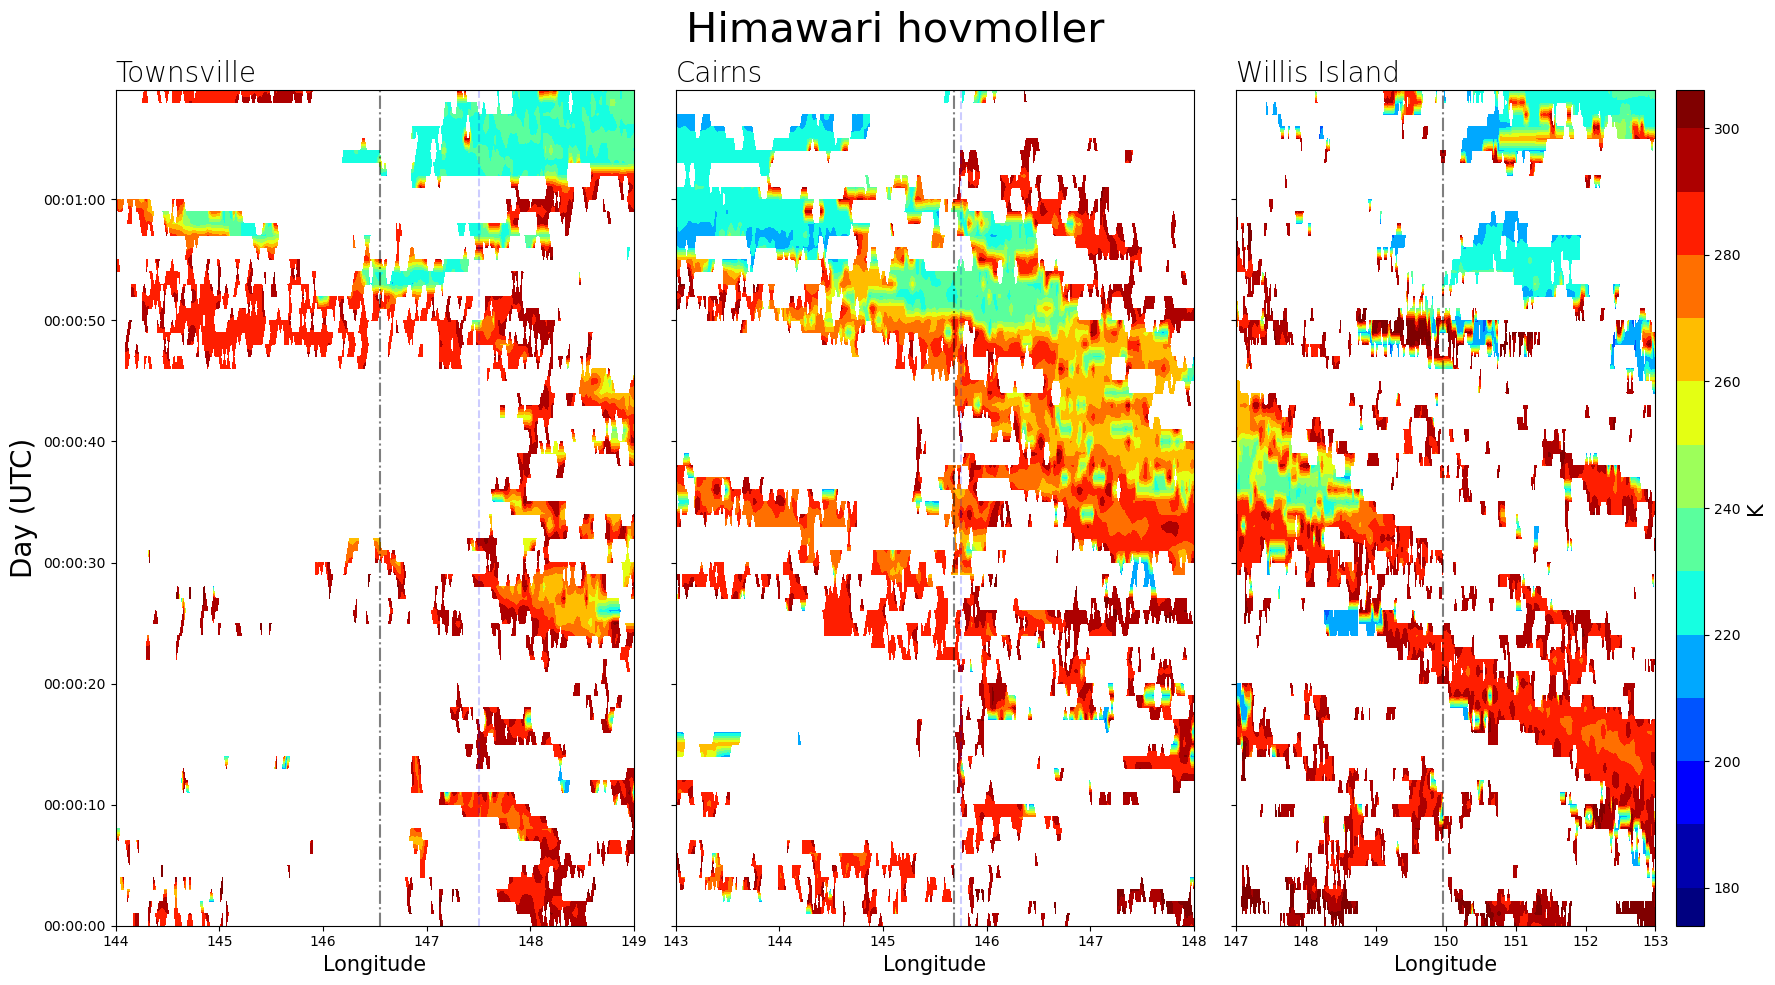

In [24]:
plot_hovmoller([180,190,200,210,220,230,240,250,260,270,280,290,300],"jet","Himawari hovmoller","K")

# Radar and CTT on same plot

In [6]:
files_T = ["/g/data/rq0/level_2/73/REFLECTIVITY/73_20220208_reflectivity.nc",
           "/g/data/rq0/level_2/73/REFLECTIVITY/73_20220209_reflectivity.nc",
           "/g/data/rq0/level_2/73/REFLECTIVITY/73_20220210_reflectivity.nc",
           "/g/data/rq0/level_2/73/REFLECTIVITY/73_20220211_reflectivity.nc",
           "/g/data/rq0/level_2/73/REFLECTIVITY/73_20220212_reflectivity.nc",
           "/g/data/rq0/level_2/73/REFLECTIVITY/73_20220213_reflectivity.nc",
           "/g/data/rq0/level_2/73/REFLECTIVITY/73_20220214_reflectivity.nc",
           "/g/data/rq0/level_2/73/REFLECTIVITY/73_20220215_reflectivity.nc"]
print('files Townsville: ',files_T)

files_C = ["/g/data/rq0/level_2/19/REFLECTIVITY/19_20220208_reflectivity.nc",
           "/g/data/rq0/level_2/19/REFLECTIVITY/19_20220209_reflectivity.nc",
           "/g/data/rq0/level_2/19/REFLECTIVITY/19_20220210_reflectivity.nc",
           "/g/data/rq0/level_2/19/REFLECTIVITY/19_20220211_reflectivity.nc",
           "/g/data/rq0/level_2/19/REFLECTIVITY/19_20220212_reflectivity.nc",
           "/g/data/rq0/level_2/19/REFLECTIVITY/19_20220213_reflectivity.nc",
           "/g/data/rq0/level_2/19/REFLECTIVITY/19_20220214_reflectivity.nc",
           "/g/data/rq0/level_2/19/REFLECTIVITY/19_20220215_reflectivity.nc"]
print('files Cairns: ',files_C)

files_W = ["/g/data/rq0/level_2/41/REFLECTIVITY/41_20220208_reflectivity.nc",
           "/g/data/rq0/level_2/41/REFLECTIVITY/41_20220209_reflectivity.nc",
           "/g/data/rq0/level_2/41/REFLECTIVITY/41_20220210_reflectivity.nc",
           "/g/data/rq0/level_2/41/REFLECTIVITY/41_20220211_reflectivity.nc",
           "/g/data/rq0/level_2/41/REFLECTIVITY/41_20220212_reflectivity.nc",
           "/g/data/rq0/level_2/41/REFLECTIVITY/41_20220213_reflectivity.nc",
           "/g/data/rq0/level_2/41/REFLECTIVITY/41_20220214_reflectivity.nc",
           "/g/data/rq0/level_2/41/REFLECTIVITY/41_20220215_reflectivity.nc"]
print('files Willis Island: ',files_W)

# open datasets
ds_T = xr.open_mfdataset(files_T, engine="netcdf4")
ds_C = xr.open_mfdataset(files_C, engine="netcdf4")
ds_W = xr.open_mfdataset(files_W, engine="netcdf4")

files Townsville:  ['/g/data/rq0/level_2/73/REFLECTIVITY/73_20220208_reflectivity.nc', '/g/data/rq0/level_2/73/REFLECTIVITY/73_20220209_reflectivity.nc', '/g/data/rq0/level_2/73/REFLECTIVITY/73_20220210_reflectivity.nc', '/g/data/rq0/level_2/73/REFLECTIVITY/73_20220211_reflectivity.nc', '/g/data/rq0/level_2/73/REFLECTIVITY/73_20220212_reflectivity.nc', '/g/data/rq0/level_2/73/REFLECTIVITY/73_20220213_reflectivity.nc', '/g/data/rq0/level_2/73/REFLECTIVITY/73_20220214_reflectivity.nc', '/g/data/rq0/level_2/73/REFLECTIVITY/73_20220215_reflectivity.nc']
files Cairns:  ['/g/data/rq0/level_2/19/REFLECTIVITY/19_20220208_reflectivity.nc', '/g/data/rq0/level_2/19/REFLECTIVITY/19_20220209_reflectivity.nc', '/g/data/rq0/level_2/19/REFLECTIVITY/19_20220210_reflectivity.nc', '/g/data/rq0/level_2/19/REFLECTIVITY/19_20220211_reflectivity.nc', '/g/data/rq0/level_2/19/REFLECTIVITY/19_20220212_reflectivity.nc', '/g/data/rq0/level_2/19/REFLECTIVITY/19_20220213_reflectivity.nc', '/g/data/rq0/level_2/19/RE

In [7]:
lat_T = ds_T["latitude"].isel(y=150,time=0) 
lat_C = ds_C["latitude"].isel(y=150,time=0) 
lat_W = ds_W["latitude"].isel(y=150,time=0)
lon_T = ds_T.longitude
lon_C = ds_C.longitude
lon_W = ds_W.longitude
start_time = '2022-02-08T00:00:00.000000000'
end_time = '2022-02-15T23:55:00.000000000'
time_slice = slice(start_time, end_time)
variable_data_T = ds_T["reflectivity"].isel(y=150).sel(time=time_slice)

In [8]:
def plot_hovmoller_radar(start,end,n,variable,suptitle,level_data,cmap,cbar_units,anomaly=None):  
    # create time slices between 25th and 28th
    start_time = start
    end_time = end
    time_slice = slice(start_time, end_time)
    lat_T = ds_T["latitude"].isel(y=150,time=0) # -19.4198
    lat_C = ds_C["latitude"].isel(y=150,time=0) # -16.817 
    lat_W = ds_W["latitude"].isel(y=150,time=0) # -16.2874 

    # Get data, selecting time, lat/lon slice
    if anomaly==True: 
        # must first convert dBZ values to dB
        #db_T = ds_T[variable].isel(y=150).sel(time=time_slice).values
        
        variable_data_T = ds_T[variable].isel(y=150).sel(time=time_slice
                        ).groupby("time.day") - ds_T[variable].isel(y=150).sel(
                        time=time_slice).groupby("time.day").mean()

        variable_data_C = ds_C[variable].isel(y=150).sel(time=time_slice
                        ).groupby("time.day") - ds_C[variable].isel(y=150).sel(
                        time=time_slice).groupby("time.day").mean()

        variable_data_W = ds_W[variable].isel(y=150).sel(time=time_slice
                        ).groupby("time.day") - ds_W[variable].isel(y=150).sel(
                        time=time_slice).groupby("time.day").mean()
        
    else:
        variable_data_T = ds_T[variable].isel(y=150).sel(time=time_slice)
        variable_data_C = ds_C[variable].isel(y=150).sel(time=time_slice)
        variable_data_W = ds_W[variable].isel(y=150).sel(time=time_slice)

    # Get times and make array of datetime objects
    variable_times_T = variable_data_T.time.values.astype('datetime64[ns]').astype('O')
    variable_times_C = variable_data_C.time.values.astype('datetime64[ns]').astype('O')
    variable_times_W = variable_data_W.time.values.astype('datetime64[ns]').astype('O')

    # Specify longitude values for chosen domain
    lons_T = variable_data_T.x.values
    lons_C = variable_data_C.x.values
    lons_W = variable_data_W.x.values 
    
    # make plot
    fig, ax = plt.subplots(1,3,figsize=(18,10))
    fig.patch.set_facecolor('white')

    # Set some titles
    ax[0].set_title('Townsville', loc='left', fontsize=20,fontweight=0.9)
    ax[1].set_title('Cairns', loc='left', fontsize=20,fontweight=0.9)
    ax[2].set_title('Willis Island', loc='left', fontsize=20,fontweight=0.9)
    fig.figure.suptitle(suptitle,fontsize=30) #,x=0.2,y=0.98,

    # Plot of chosen variable averaged over latitude and slightly smoothed
    levels = level_data
    cf_T = ax[0].contourf(lons_T, variable_times_T, variable_data_T, levels=levels, cmap=cmap, extend='both')
    cf_C = ax[1].contourf(lons_C, variable_times_C, variable_data_C, levels=levels, cmap=cmap, extend='both')
    cf_W = ax[2].contourf(lons_W, variable_times_W, variable_data_W, levels=levels, cmap=cmap, extend='both')

#    line_colors = ['black' for l in cf_T.levels]
#    cs_T = ax[0].contour(lons_T, variable_times_T, variable_data_T, alpha=0.5,colors=line_colors, linewidths=0.8,linestyles='-')
#    cs_C = ax[1].contour(lons_C, variable_times_C, variable_data_C, alpha=0.5,colors=line_colors, linewidths=0.8,linestyles='-')
#    cs_W = ax[2].contour(lons_W, variable_times_W, variable_data_W, alpha=0.5,colors=line_colors, linewidths=0.8,linestyles='-')                 
                    
    # cbar and cbar label                
    cbar_W = plt.colorbar(cf_W, ax=ax[2],orientation='vertical', pad=0.04, aspect=30, extendrect=True)
    cbar_W.set_label(cbar_units,fontsize=15)
    
    # plot locations of radars
    ax[0].axvline(x=150,color='k',alpha=0.5,linestyle='-.')
    ax[1].axvline(x=150,color='k',alpha=0.5,linestyle='-.')
    ax[2].axvline(x=150,color='k',alpha=0.5,linestyle='-.')
    
    ax[0].set_yticks(variable_times_T)
    ax[0].locator_params(axis='y', nbins=n)
    ax[0].set_yticklabels(variable_data_T.time.values.astype('datetime64[s]')) #datetime64[ns] = nano-second precision
    # datetime64[s] = second precision; datetime64[D] = date precision
    ax[1].set(yticklabels=[]) 
    ax[2].set(yticklabels=[]) 
    
    ax[0].set_xticks(lons_T)
    ax[0].set_xticklabels(ds_T["longitude"].isel(y=150,time=0).values)
    ax[0].locator_params(axis='x', nbins=5)
    ax[1].set_xticks(lons_C)
    ax[1].set_xticklabels(ds_C["longitude"].isel(y=150,time=0).values)
    ax[1].locator_params(axis='x', nbins=5)
    ax[2].set_xticks(lons_W)
    ax[2].set_xticklabels(ds_W["longitude"].isel(y=150,time=0).values)
    ax[2].locator_params(axis='x', nbins=5)
    
    ax[0].set_xlabel("Longitude",fontsize=15)
    ax[1].set_xlabel("Longitude",fontsize=15)
    ax[2].set_xlabel("Longitude",fontsize=15)
    ax[0].set_ylabel("Date",fontsize=20)            
                    
    fig.tight_layout()
    plt.show()
    return

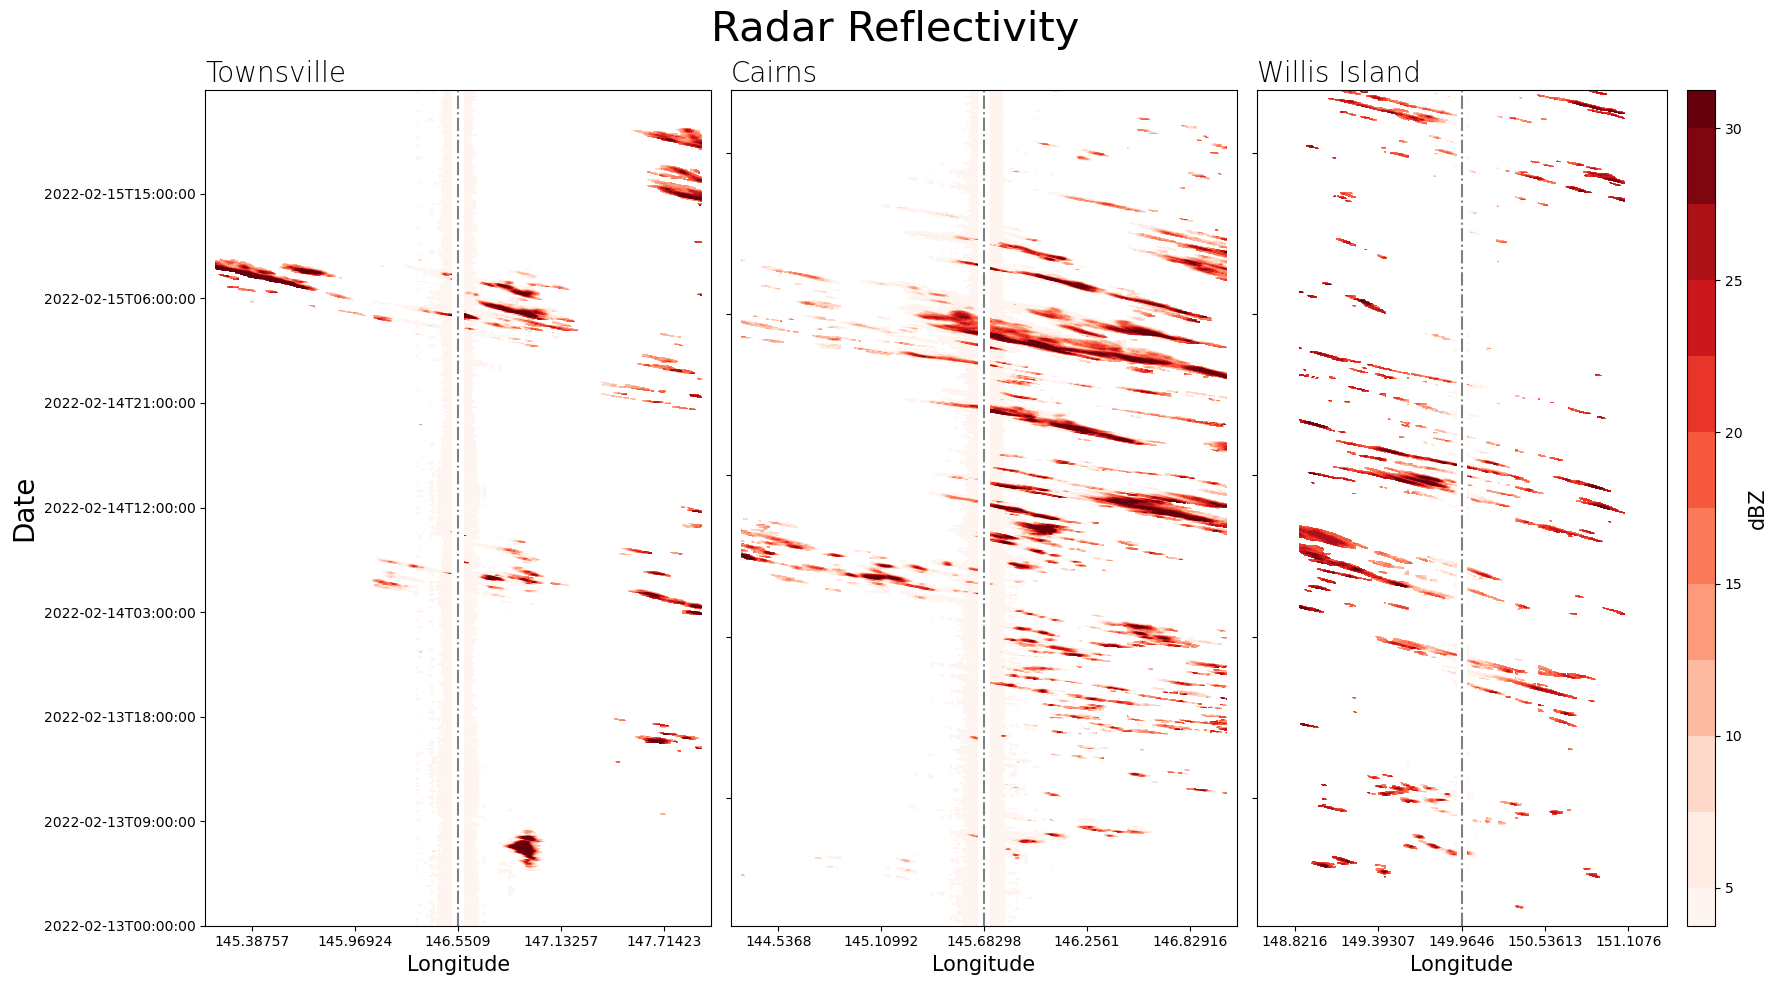

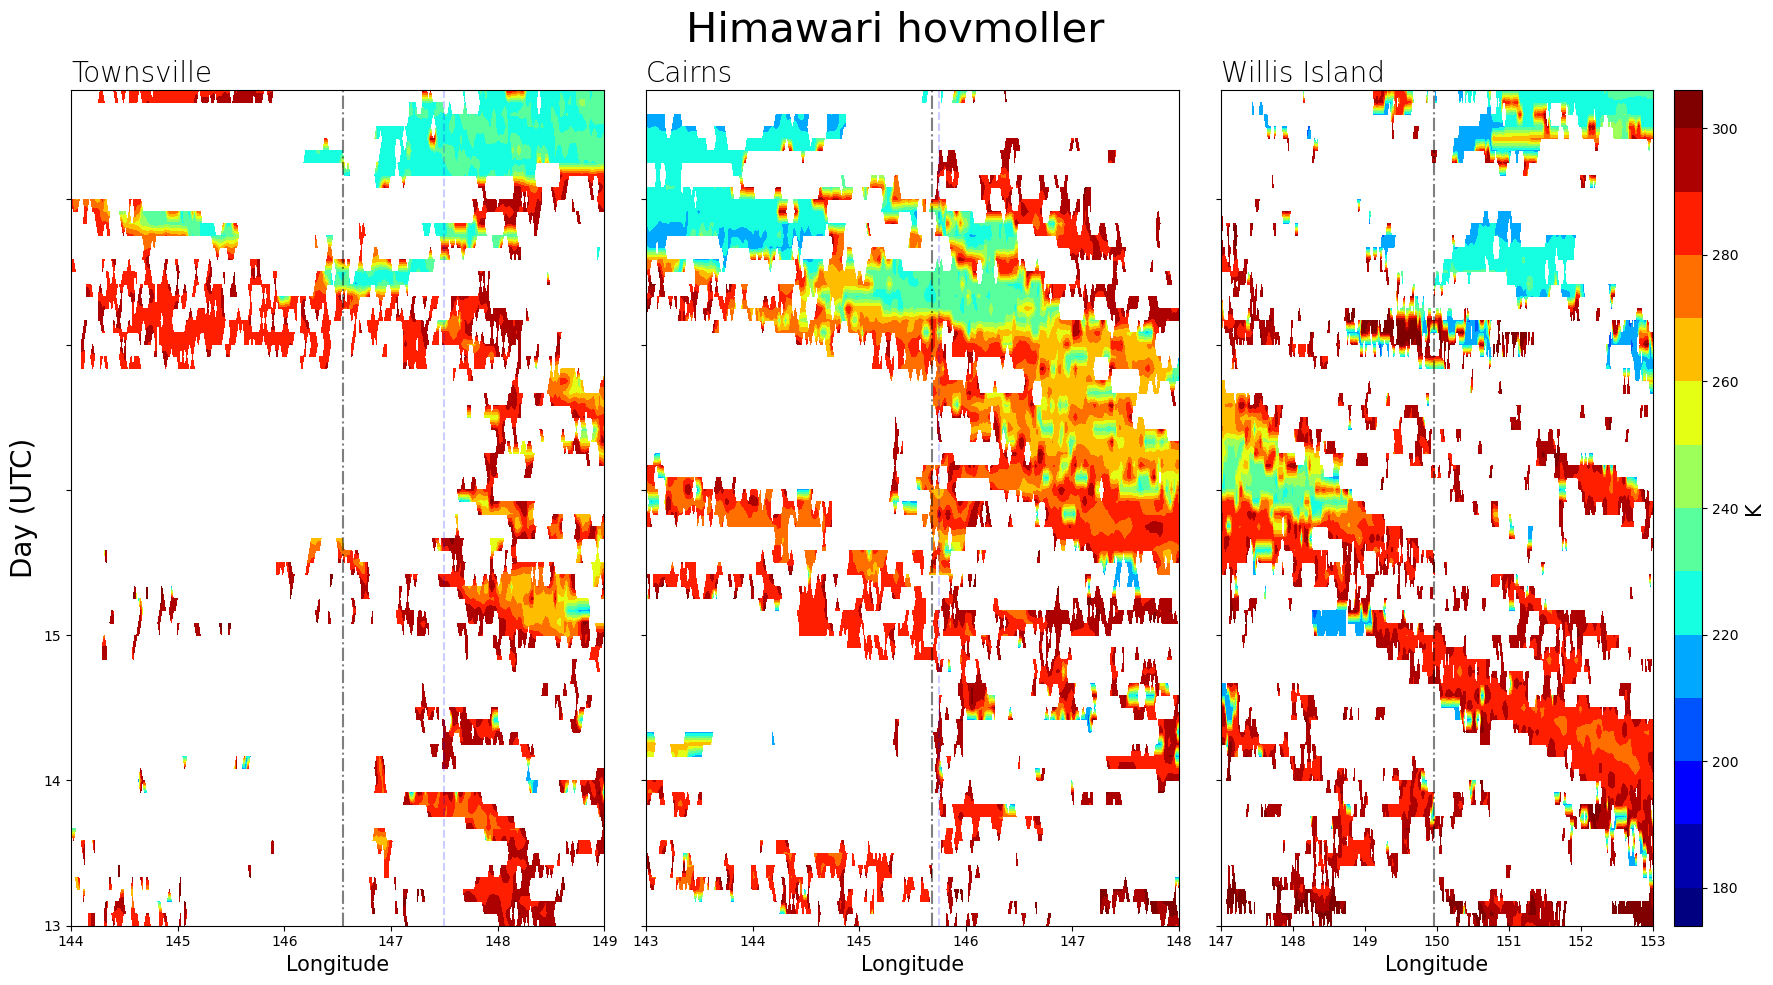

In [11]:
plot_hovmoller_radar('2022-02-13T00:00:00.000000000','2022-02-15T23:55:00.000000000',8,"reflectivity","Radar Reflectivity",
               [5,7.5,10,12.5,15,17.5,20,22.5,25,27.5,30],"Reds","dBZ",anomaly=False)
plot_hovmoller([180,190,200,210,220,230,240,250,260,270,280,290,300],"jet","Himawari hovmoller","K")

In [5]:
indir = '/g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/L1/' 
print('indir: ',indir)
file = indir+'geocatL1.HIMAWARI-8.2022045.170000.FLDK.R20.nc'
print('file: ',file)

indir:  /g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/L1/
file:  /g/data/v46/lb5963/HIMAWARI/08_V46_SUMM_2021-22/L1/geocatL1.HIMAWARI-8.2022045.170000.FLDK.R20.nc


In [9]:
ds_him8BT = xr.open_dataset(file, engine="netcdf4")
lat = ds_him8BT.pixel_latitude
lon = ds_him8BT.pixel_longitude

In [10]:
projPC = ccrs.PlateCarree()
lonW = 140
lonE = 155
latS = -22
latN = -12
cLat = (latN + latS) / 2
cLon = (lonW + lonE) / 2
res = '50m'
lon = ds_him8BT["pixel_longitude"]
lat = ds_him8BT["pixel_latitude"]
clevels = range(180,300,1)

TypeError: Input z must be 2D, not 3D

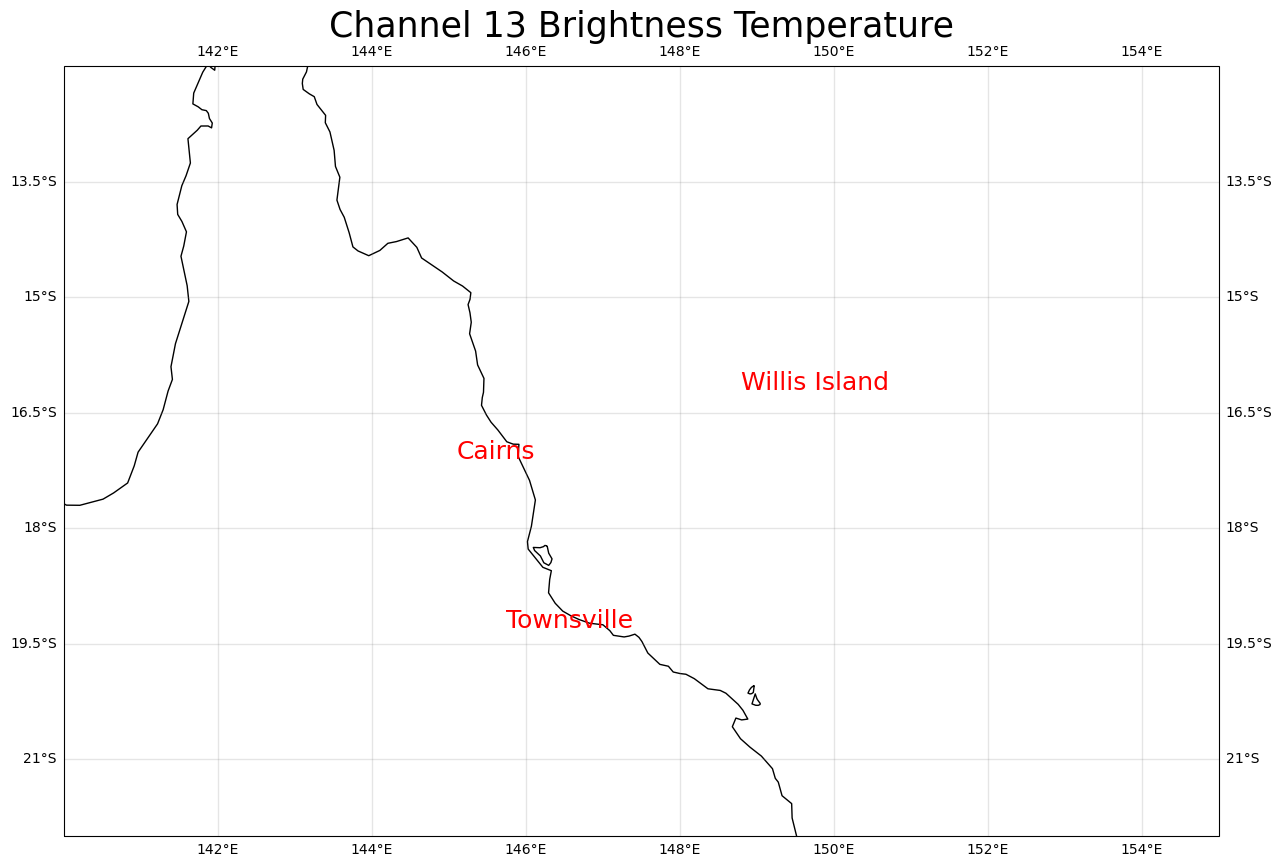

In [11]:
fig = plt.figure(figsize=(20, 10))
fig.tight_layout()
fig.patch.set_facecolor('white')
ax = plt.subplot(1, 1, 1, projection=projPC)
ax.set_title('Channel 13 Brightness Temperature',fontsize=25)
ax.set_ylabel("Latitude")
ax.set_xlabel("Longitude")
ax.annotate("Townsville",(145.75,-19.3),fontsize=18,color="red")
ax.annotate("Cairns",(145.1,-17.1),fontsize=18,color="red")
ax.annotate("Willis Island",(148.8,-16.2),fontsize=18,color="red")
gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.2, linestyle='-')
ax.set_extent([lonW, lonE, latS, latN], crs=projPC)
#nan_cmap = np.isnan(ds["himawari_8_ahi_channel_13_brightness_temperature"])
#ax.pcolormesh(lon,lat,nan_cmap,color="black")
ax.coastlines(resolution=res, color='black')
cs = ax.contourf(lon,lat,ds_him8CTT.variables["Band1"],levels=clevels,cmap="binary")
cbar = plt.colorbar(cs,aspect=25,orientation='vertical',ax=ax,ticks=[180,190,200,210,220,230,240,250,260,270,280,290,300])
cbar.set_label('K',fontsize=20) 
circle_T = mpatches.Circle((146.5509,-19.4198),0.1,alpha=0.5,fc="red") # Townsville
circle_C = mpatches.Circle((145.683,-16.817),0.1,alpha=0.5,fc="red") # Cairns
circle_W = mpatches.Circle((149.9646,-16.2874),0.1,alpha=0.5,fc="red") # Willis Island
ax.add_patch(circle_T)
ax.add_patch(circle_C)
ax.add_patch(circle_W);